In [23]:
# pip install pandas-datareader

In [24]:
import pandas_datareader.data as pdr
import statsmodels.api as sm
import pandas as pd

In [25]:
wft = pdr.DataReader("GOOG", 'yahoo', '2016-6-14', '2021-6-11')
wft.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-06-14,722.469971,713.119995,716.479980,718.270020,1306100,718.270020
2016-06-15,722.979980,717.309998,719.000000,718.919983,1214500,718.919983
2016-06-16,716.650024,703.260010,714.909973,710.359985,1982500,710.359985
2016-06-17,708.820007,688.452026,708.650024,691.719971,3402400,691.719971
2016-06-20,702.479980,693.409973,698.770020,693.710022,2082500,693.710022


In [26]:
# calculando rendimiento acumulado diario
rendimiento_diario = (1 + wft['Close'].pct_change())
wft['rend_diario'] = rendimiento_diario
wft['rend_diario']

Date
2016-06-14         NaN
2016-06-15    1.000905
2016-06-16    0.988093
2016-06-17    0.973760
2016-06-20    1.002877
                ...   
2021-06-07    1.005845
2021-06-08    1.006796
2021-06-09    1.003444
2021-06-10    1.012122
2021-06-11    0.996958
Name: rend_diario, Length: 1258, dtype: float64

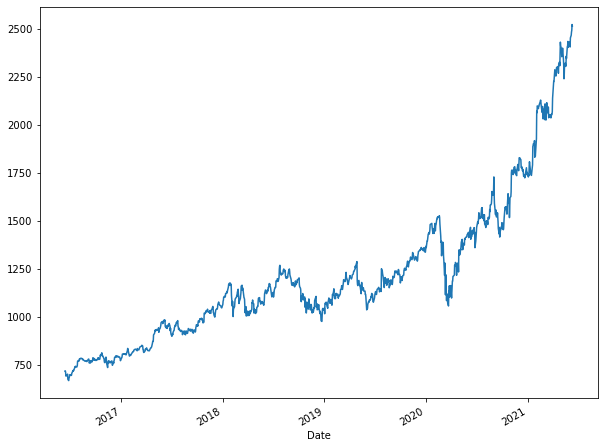

In [27]:
# graficando Close
plot = wft['Close'].plot(figsize=(10, 8))

In [28]:
# Aplicando el filtro Hodrick-Prescott para separar en tendencia y 
# componente ciclico.
wft_ciclo, wft_tend = sm.tsa.filters.hpfilter(wft['Close'])
wft['tend'] = wft_tend
wft['ciclo'] = wft_ciclo

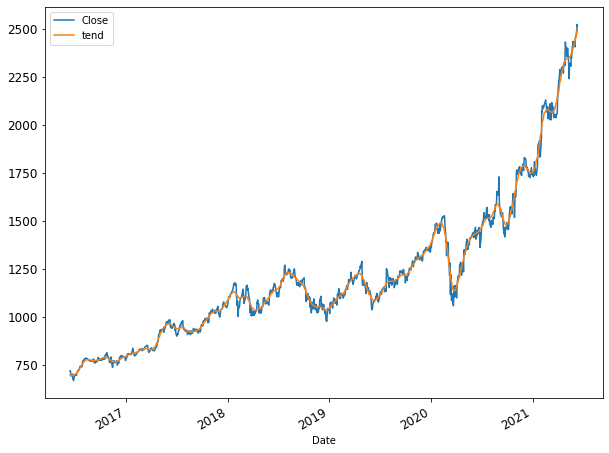

In [29]:
# graficando la variacion del precio real con la tendencia.
import matplotlib as plt

wft[['Close', 'tend']].plot(figsize=(10, 8), fontsize=12);

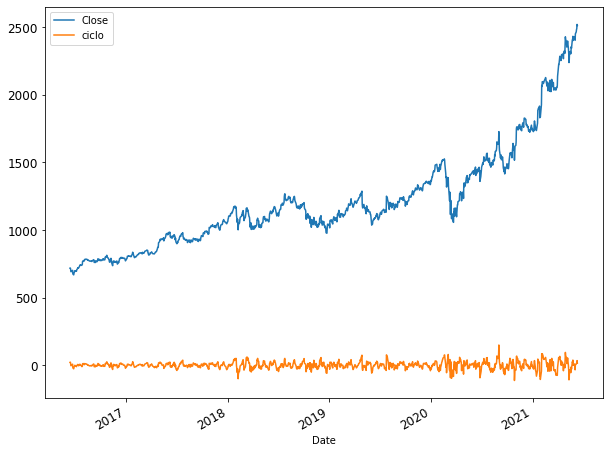

In [30]:
wft[['Close', 'ciclo']].plot(figsize=(10, 8), fontsize=12);

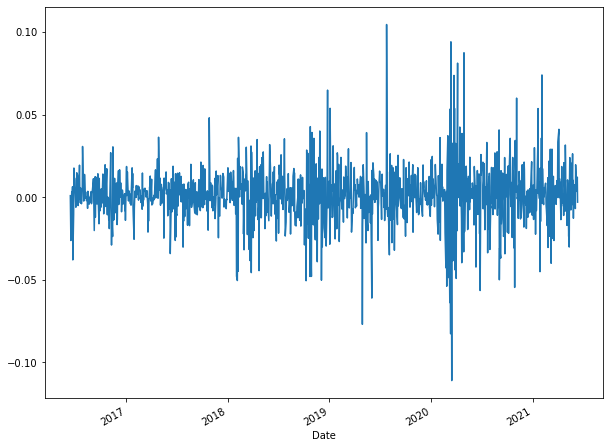

In [31]:
# graficando rendimiento diario
# calculando el porcentaje de variación del día.
variacion_diaria = wft['Close'] / wft['Close'].shift(1) - 1
wft['var_diaria'] = variacion_diaria
plot = wft['var_diaria'].plot(figsize=(10, 8))

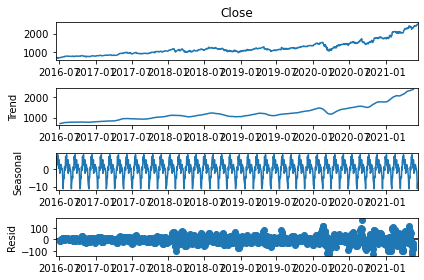

In [32]:
# Ejemplo de descomposición de serie de tiempo
descomposicion = sm.tsa.seasonal_decompose(wft['Close'], model='additive', period=30)
fig = descomposicion.plot()

/Users/lneumann/.conda/envs/dgef-data-science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/lneumann/.conda/envs/dgef-data-science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/lneumann/.conda/envs/dgef-data-science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/lneumann/.conda/envs/dgef-data-science/lib/py

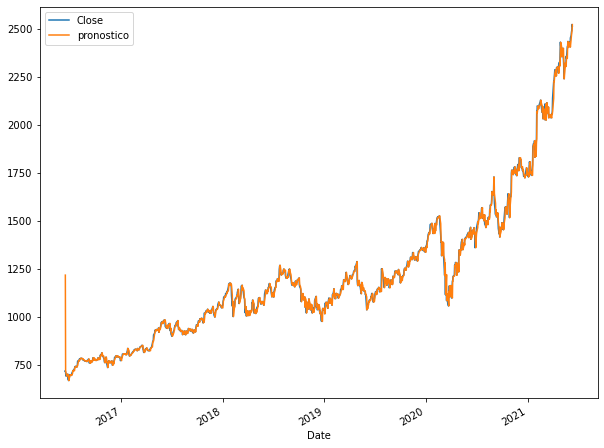

In [33]:
# Modelo ARIMA sobre el valor de cierre de la acción.
modelo = sm.tsa.ARIMA(wft['Close'].iloc[1:], order=(1, 0, 0))
#resultados = modelo.fit(disp=-1)
resultados = modelo.fit()
wft['pronostico'] = resultados.fittedvalues
plot = wft[['Close', 'pronostico']].plot(figsize=(10, 8))

/Users/lneumann/.conda/envs/dgef-data-science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/lneumann/.conda/envs/dgef-data-science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/lneumann/.conda/envs/dgef-data-science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


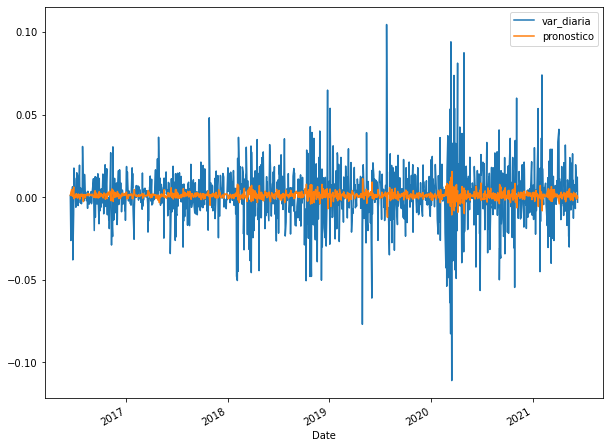

In [34]:
# modelo ARIMA sobre variación diaria
modelo = sm.tsa.ARIMA(wft['var_diaria'].iloc[1:], order=(2, 0, 0))
resultados = modelo.fit()
wft['pronostico'] = resultados.fittedvalues
plot = wft[['var_diaria', 'pronostico']].plot(figsize=(10, 8))

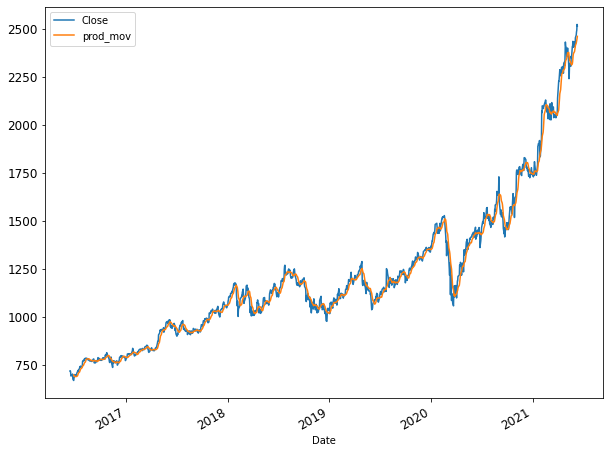

In [35]:
# Calculando promedios móviles cada 5 días
#wft_ma = pd.rolling_mean(wft['Close'],5)
moving_avg = wft['Close'].rolling(10).mean()
wft['prod_mov'] = moving_avg
plot = wft[['Close', 'prod_mov']].plot(figsize=(10, 8), fontsize=12)

In [36]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

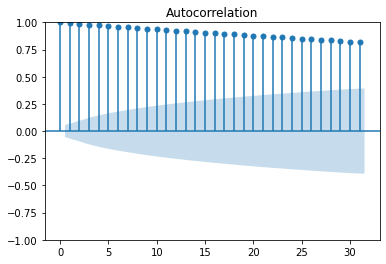

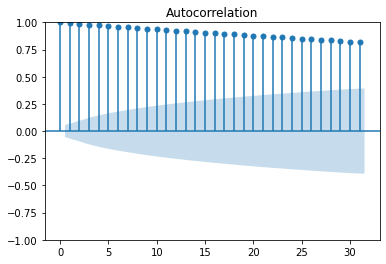

In [37]:
plot_acf(wft['Close'])

/Users/lneumann/.conda/envs/dgef-data-science/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


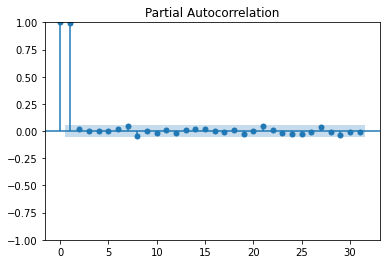

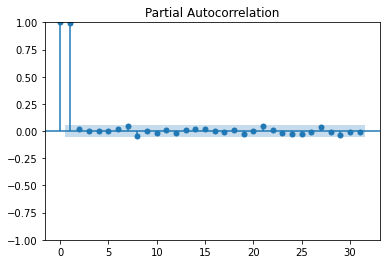

In [38]:
plot_pacf(wft['Close'])
#La autocorrelación mide la correlación entre dos variables separadas por k periodos. 
#La autocorrelación parcial mide la correlación entre dos variables separadas por k periodos cuando no se 
#considera la dependencia creada por los retardos intermedios existentes entre ambas.